<a href="https://colab.research.google.com/github/Donyicoder2006/Project_works/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import requests
import pandas as pd

url = "https://world.openfoodfacts.org/category/snacks.json"
data = requests.get(url).json()
df = pd.DataFrame(data["products"])

In [4]:
df.head()

,_id,_keywords,added_countries_tags,additives_n,additives_original_tags,additives_tags,allergens,allergens_from_ingredients,allergens_from_user,allergens_hierarchy,...,sources_fields,abbreviated_product_name_imported,allergens_imported,labels_imported,no_nutrition_data_imported,packaging_imported,producer_version_id,producer_version_id_imported,serving_size_imported,traces_imported
0,6111242100992,"[creme, dessert, fermente, la, lacte, morocco,...",[],0,[],[],en:milk,,(en) en:milk,[en:milk],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7622210449283,"[35, and, biscuit, breakfast, cake, charte, ch...",[],3,"[en:e503, en:e500, en:e322i]","[en:e322, en:e322i, en:e500, en:e503]","en:eggs,en:gluten,en:milk,en:soybeans","en:milk, en:milk, en:soybeans, en:gluten, en:g...","(en) Eggs,Gluten,Milk,Soybeans, en:milk","[en:eggs, en:gluten, en:milk, en:soybeans]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3046920029759,"[90, and, bar, chocolate, cocoa, dark, dot, ex...",[],0,[],[],,,(en),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3046920028004,"[70, and, bar, chocolate, cocoa, dark, dot, ex...",[],0,[],[],,,(en),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6111031005064,"[and, beverage, bimo, biscuit, cake, candie, c...",[],0,[],[],"en:gluten,en:milk,en:soybeans","en:milk, Lécithine de soja, lait, blé, gluten,...","(en) en:gluten,en:milk,en:soybeans, en:gluten","[en:gluten, en:milk, en:soybeans]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
categories = [
    "snacks",
    "desserts",
    "ice-creams",
    "breakfast-cereals",
    "ready-meals",
    "soups",
    "biscuits",
    "chocolate-products",
    "pastries",
    "dairy-products",
    "cheeses",
    "yogurts",
    "sauces",
    "salty-snacks",
    "sweet-snacks",
    "beverages",
    "juices",
    "carbonated-drinks",
    "teas",
    "coffees",
    "breads",
    "meals",
    "pizzas",
    "pastas"
]


In [6]:
import requests
import pandas as pd

categories = [
    "snacks", "desserts", "ice-creams", "breakfast-cereals", "ready-meals",
    "soups", "biscuits", "chocolate-products", "pastries", "dairy-products",
    "cheeses", "yogurts", "sauces", "salty-snacks", "sweet-snacks",
    "beverages", "juices", "carbonated-drinks", "teas", "coffees",
    "breads", "meals", "pizzas", "pastas"
]

all_products = []

for cat in categories:
    print(f"Downloading category: {cat}...")
    url = f"https://world.openfoodfacts.org/category/{cat}.json"
    data = requests.get(url).json()
    products = data.get("products", [])
    all_products.extend(products)

df = pd.DataFrame(all_products)
print("Total products:", len(df))


Total products: 480


In [7]:
useful_columns = [
    "product_name", "brands", "categories", "nutriscore_grade",
    "nova_group", "unique_scans_n",
    "image_url", "image_front_url"
]

df = df[useful_columns]
df = df.dropna(subset=["image_url"])  # remove items with no image
df = df.drop_duplicates(subset=["product_name", "brands"])
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(387, 8)


,product_name,brands,categories,nutriscore_grade,nova_group,unique_scans_n,image_url,image_front_url
0,perly,perly,"Snacks,Desserts lactés fermentés nature à la c...",unknown,NaN,2257,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
1,Prince Goût Chocolat,LU,"Snacks,Breakfasts,Sweet snacks,Biscuits and ca...",e,4.0,1050,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
2,Supreme Dark 90%,Lindt,"Snacks,Sweet snacks,Cocoa and its products,Cho...",e,3.0,1045,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
3,70% chocolate,Lindt & Sprüngli,"Snacks,Sweet snacks,Cocoa and its products,Cho...",e,3.0,435,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
4,Tonik,bimo,"Plant-based foods and beverages,Plant-based fo...",e,2.0,888,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...


In [8]:
import os
import requests

os.makedirs("food_images", exist_ok=True)

def download_image(url, path):
    try:
        img = requests.get(url, timeout=5)
        if img.status_code == 200:
            with open(path, "wb") as f:
                f.write(img.content)
    except:
        pass

for i, url in enumerate(df["image_url"]):
    download_image(url, f"food_images/img_{i}.jpg")

print("Downloaded images:", len(os.listdir("food_images")))


Downloaded images: 387


In [9]:
import numpy as np

def score_nutri(x):
    mapping = {'a':5,'b':4,'c':3,'d':2,'e':1}
    return mapping.get(str(x).lower(), 0)

df["nutri_score_num"] = df["nutriscore_grade"].apply(score_nutri)

df["nova_score_num"] = df["nova_group"].fillna(0).astype(int)



df["scans"] = df["unique_scans_n"].fillna(0).astype(int)

df["success_score"] = (
    0.4*df["nutri_score_num"] +
    0.3*df["scans"] +
    0.1*(6-df["nova_score_num"])
)

df["success_score"] = (df["success_score"] - df["success_score"].min()) / \
                      (df["success_score"].max() - df["success_score"].min())

In [10]:
min_score = df['success_score'].min()
max_score = df['success_score'].max()
print(f"Minimum success score: {min_score:.2f}")
print(f"Maximum success score: {max_score:.2f}")

Minimum success score: 0.00
Maximum success score: 1.00


In [11]:
import os

score_range = max_score - min_score
low_threshold = min_score + score_range / 3
medium_threshold = min_score + 2 * score_range / 3

score_labels = {
    'Low Score': (min_score, low_threshold),
    'Medium Score': (low_threshold, medium_threshold),
    'High Score': (medium_threshold, max_score)
}

base_dir = '/content/food_images'
for label in score_labels.keys():
    dir_path = os.path.join(base_dir, label)
    os.makedirs(dir_path, exist_ok=True)
    print(f"Created directory: {dir_path}")


Created directory: /content/food_images/Low Score
Created directory: /content/food_images/Medium Score
Created directory: /content/food_images/High Score


In [12]:
import os

for index, row in df.iterrows():
    score = row['success_score']
    image_file_name = f"img_{index}.jpg"
    source_path = os.path.join(base_dir, image_file_name)

    destination_label = None
    for label, (low, high) in score_labels.items():
        if low <= score <= high:
            destination_label = label
            break

    if destination_label:
        destination_dir = os.path.join(base_dir, destination_label)
        destination_path = os.path.join(destination_dir, image_file_name)

        try:
            os.rename(source_path, destination_path)
        except FileNotFoundError:
            print(f"Warning: Image not found at {source_path}. Skipping.")
        except Exception as e:
            print(f"Error moving {source_path} to {destination_path}: {e}")

print("Images categorized and moved successfully.")


Images categorized and moved successfully.


In [13]:
import os

base_dir = '/content/food_images'

print("Verifying image counts in categorized directories:")
for label in score_labels.keys():
    dir_path = os.path.join(base_dir, label)
    if os.path.exists(dir_path):
        num_images = len(os.listdir(dir_path))
        print(f"  {label}: {num_images} images")
    else:
        print(f"  Directory not found: {dir_path}")

Verifying image counts in categorized directories:
  Low Score: 369 images
  Medium Score: 15 images
  High Score: 3 images


In [14]:
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['nova_group', 'unique_scans_n', 'nutri_score_num', 'nova_score_num', 'scans', 'success_score']
Categorical Columns: ['product_name', 'brands', 'categories', 'nutriscore_grade', 'image_url', 'image_front_url']


In [15]:
augmented_df = df.sample(frac=0.2, random_state=42).copy()
print(f"Original df shape: {df.shape}")
print(f"Augmented df shape: {augmented_df.shape}")

Original df shape: (387, 12)
Augmented df shape: (77, 12)


In [16]:
for col in numerical_cols:
    if col in augmented_df.columns:
        std_dev = augmented_df[col].std()
        if pd.isna(std_dev) or std_dev == 0:
            noise_scale = 0.01
        else:
            noise_scale = 0.01 * std_dev

        noise = np.random.normal(0, noise_scale, size=len(augmented_df))
        augmented_df[col] = augmented_df[col] + noise

print("Numerical columns augmented with noise.")

Numerical columns augmented with noise.


In [17]:
for col in categorical_cols:
    if col in augmented_df.columns:
        unique_values = df[col].dropna().unique()
        if len(unique_values) > 1:

            num_to_augment = int(len(augmented_df) * 0.05)
            if num_to_augment == 0 and len(augmented_df) > 0:
                num_to_augment = 1

            indices_to_change = np.random.choice(augmented_df.index, size=num_to_augment, replace=False)

            for idx in indices_to_change:
                original_value = augmented_df.loc[idx, col]
                possible_replacements = [val for val in unique_values if val != original_value]
                if possible_replacements:
                    new_value = np.random.choice(possible_replacements)
                    augmented_df.loc[idx, col] = new_value

print("Categorical columns augmented with random value replacements.")

Categorical columns augmented with random value replacements.


In [18]:
combined_df = pd.concat([df, augmented_df], ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")

Combined DataFrame shape: (464, 12)


In [19]:
print("Combined DataFrame Info:")
combined_df.info()
print("\nFirst 5 rows of Combined DataFrame:")
display(combined_df.head())

Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      460 non-null    object 
 1   brands            454 non-null    object 
 2   categories        464 non-null    object 
 3   nutriscore_grade  464 non-null    object 
 4   nova_group        398 non-null    float64
 5   unique_scans_n    464 non-null    float64
 6   image_url         464 non-null    object 
 7   image_front_url   464 non-null    object 
 8   nutri_score_num   464 non-null    float64
 9   nova_score_num    464 non-null    float64
 10  scans             464 non-null    float64
 11  success_score     464 non-null    float64
dtypes: float64(6), object(6)
memory usage: 43.6+ KB

First 5 rows of Combined DataFrame:


,product_name,brands,categories,nutriscore_grade,nova_group,unique_scans_n,image_url,image_front_url,nutri_score_num,nova_score_num,scans,success_score
0,perly,perly,"Snacks,Desserts lactés fermentés nature à la c...",unknown,NaN,2257.0,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,2257.0,0.705858
1,Prince Goût Chocolat,LU,"Snacks,Breakfasts,Sweet snacks,Biscuits and ca...",e,4.0,1050.0,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,1.0,4.0,1050.0,0.328434
2,Supreme Dark 90%,Lindt,"Snacks,Sweet snacks,Cocoa and its products,Cho...",e,3.0,1045.0,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,1.0,3.0,1045.0,0.326975
3,70% chocolate,Lindt & Sprüngli,"Snacks,Sweet snacks,Cocoa and its products,Cho...",e,3.0,435.0,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,1.0,3.0,435.0,0.136231
4,Tonik,bimo,"Plant-based foods and beverages,Plant-based fo...",e,2.0,888.0,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,1.0,2.0,888.0,0.277986


In [20]:
import os

image_paths = []
labels = []

for label in score_labels.keys():
    dir_path = os.path.join(base_dir, label)
    if os.path.exists(dir_path):
        for filename in os.listdir(dir_path):
            image_path = os.path.join(dir_path, filename)
            image_paths.append(image_path)
            labels.append(label)

image_df = pd.DataFrame({"path": image_paths, "label": labels})

print("First 5 rows of image_df:")
display(image_df.head())
print(f"Shape of image_df: {image_df.shape}")

First 5 rows of image_df:


,path,label
0,/content/food_images/Low Score/img_159.jpg,Low Score
1,/content/food_images/Low Score/img_286.jpg,Low Score
2,/content/food_images/Low Score/img_188.jpg,Low Score
3,/content/food_images/Low Score/img_213.jpg,Low Score
4,/content/food_images/Low Score/img_328.jpg,Low Score


Shape of image_df: (387, 2)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    image_df['path'], image_df['label'],
    test_size=0.4, random_state=42, stratify=image_df['label']
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42
)

print(f"Training set size: {len(X_train)} images")
print(f"Validation set size: {len(X_val)} images")
print(f"Test set size: {len(X_test)} images")


Training set size: 232 images
Validation set size: 77 images
Test set size: 78 images


In [22]:
train_df = pd.DataFrame({'path': X_train, 'label': y_train})

print("First 5 rows of train_df:")
display(train_df.head())
print(f"Shape of train_df: {train_df.shape}")

First 5 rows of train_df:


,path,label
23,/content/food_images/Low Score/img_25.jpg,Low Score
74,/content/food_images/Low Score/img_34.jpg,Low Score
250,/content/food_images/Low Score/img_138.jpg,Low Score
231,/content/food_images/Low Score/img_227.jpg,Low Score
346,/content/food_images/Low Score/img_212.jpg,Low Score


Shape of train_df: (232, 2)


In [23]:
val_df = pd.DataFrame({'path': X_val, 'label': y_val})

print("First 5 rows of val_df:")
display(val_df.head())
print(f"Shape of val_df: {val_df.shape}")

First 5 rows of val_df:


,path,label
162,/content/food_images/Low Score/img_204.jpg,Low Score
307,/content/food_images/Low Score/img_98.jpg,Low Score
308,/content/food_images/Low Score/img_205.jpg,Low Score
254,/content/food_images/Low Score/img_305.jpg,Low Score
80,/content/food_images/Low Score/img_379.jpg,Low Score


Shape of val_df: (77, 2)


In [24]:
test_df = pd.DataFrame({'path': X_test, 'label': y_test})

print("First 5 rows of test_df:")
display(test_df.head())
print(f"Shape of test_df: {test_df.shape}")

First 5 rows of test_df:


,path,label
44,/content/food_images/Low Score/img_347.jpg,Low Score
386,/content/food_images/High Score/img_230.jpg,High Score
4,/content/food_images/Low Score/img_328.jpg,Low Score
322,/content/food_images/Low Score/img_383.jpg,Low Score
133,/content/food_images/Low Score/img_143.jpg,Low Score


Shape of test_df: (78, 2)


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array,array_to_img

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
val_df.head()

,path,label
162,/content/food_images/Low Score/img_204.jpg,Low Score
307,/content/food_images/Low Score/img_98.jpg,Low Score
308,/content/food_images/Low Score/img_205.jpg,Low Score
254,/content/food_images/Low Score/img_305.jpg,Low Score
80,/content/food_images/Low Score/img_379.jpg,Low Score


In [28]:
train_df.head()

,path,label
23,/content/food_images/Low Score/img_25.jpg,Low Score
74,/content/food_images/Low Score/img_34.jpg,Low Score
250,/content/food_images/Low Score/img_138.jpg,Low Score
231,/content/food_images/Low Score/img_227.jpg,Low Score
346,/content/food_images/Low Score/img_212.jpg,Low Score


In [29]:
test_df.head()

,path,label
44,/content/food_images/Low Score/img_347.jpg,Low Score
386,/content/food_images/High Score/img_230.jpg,High Score
4,/content/food_images/Low Score/img_328.jpg,Low Score
322,/content/food_images/Low Score/img_383.jpg,Low Score
133,/content/food_images/Low Score/img_143.jpg,Low Score


In [30]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=base_dir,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 232 validated image filenames belonging to 3 classes.


In [31]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=base_dir,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32
)
validate_generator = validate_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = base_dir,
    x_col = 'path',
    y_col = 'label',
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 78 validated image filenames belonging to 3 classes.
Found 77 validated image filenames belonging to 1 classes.


In [32]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.0 MB/s eta 0:00:00


In [33]:
image_height, image_width = train_generator.target_size
num_classes = len(train_generator.class_indices)

print(f"Image Height: {image_height}")
print(f"Image Width: {image_width}")
print(f"Number of Classes: {num_classes}")

Image Height: 150
Image Width: 150
Number of Classes: 3


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.applications import ResNet50V2, VGG16, EfficientNetB0

print("Keras modules and pre-trained models imported successfully.")

Keras modules and pre-trained models imported successfully.


In [35]:
import keras_tuner as kt

def build_model(hp):
    base_model_choice = hp.Choice('base_model',
                                  values=['ResNet50V2', 'VGG16', 'EfficientNetB0'])

    if base_model_choice == 'ResNet50V2':
        base_model = ResNet50V2(include_top=False,
                                weights='imagenet',
                                input_shape=(image_height, image_width, 3))
    elif base_model_choice == 'VGG16':
        base_model = VGG16(include_top=False,
                           weights='imagenet',
                           input_shape=(image_height, image_width, 3))
    else:
        base_model = EfficientNetB0(include_top=False,
                                   weights='imagenet',
                                   input_shape=(image_height, image_width, 3))

    base_model.trainable = False

    x = Flatten()(base_model.output)

    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, step=1)
    for i in range(num_dense_layers):
        x = Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                  activation='relu')(x)

        if hp.Boolean(f'batch_norm_{i}'):
            x = BatchNormalization()(x)

        if hp.Boolean(f'dropout_{i}'):
            x = Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1))(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    optimizer_choice = hp.Choice('optimizer', values=['Adam', 'RMSprop', 'SGD'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

print("Model builder function 'build_model' defined successfully.")

Model builder function 'build_model' defined successfully.


In [36]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=base_dir,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    classes=list(train_generator.class_indices.keys())
)
validate_generator = validate_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=base_dir,
    x_col='path',
    y_col='label',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    classes=list(train_generator.class_indices.keys())
)

Found 78 validated image filenames belonging to 3 classes.
Found 77 validated image filenames belonging to 3 classes.


In [37]:
from keras_tuner.tuners import Hyperband

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(train_generator,
             epochs=15,
             validation_data=validate_generator,
             steps_per_epoch=len(train_generator),
             validation_steps=len(validate_generator))

print("Hyperparameter search re-initiated.")

Trial 30 Complete [00h 09m 10s]
val_accuracy: 0.5974025726318359

Best val_accuracy So Far: 1.0
Total elapsed time: 02h 33m 57s
Hyperparameter search re-initiated.


In [38]:
best_models = tuner.get_best_models(num_models=1)
best_model = best_models[0]

print("Best model loaded successfully.")

Best model loaded successfully.


In [39]:
print("Evaluating the best model on the test data...")
eval_results = best_model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Loss: {eval_results[0]:.4f}")
print(f"Test Accuracy: {eval_results[1]:.4f}")

Evaluating the best model on the test data...
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9043 - loss: 81.3846
Test Loss: 82.7847
Test Accuracy: 0.9103


In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1,
    min_delta = 0.0000000000000000000000000001,
    mode='auto',
    baseline=None,
)

In [42]:
history = best_model.fit(
    train_generator,
    epochs=100,
    initial_epoch=15, # Resume training from epoch 15
    validation_data=validate_generator,
    callbacks=[early_stop]
)

Epoch 16/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8988 - loss: 26.1333 - val_accuracy: 0.9610 - val_loss: 8.2666
Epoch 17/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9183 - loss: 32.4895 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 18/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.9556 - loss: 22.7439 - val_accuracy: 0.9870 - val_loss: 0.2539
Epoch 19/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.9450 - loss: 8.1451 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 20/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9566 - loss: 9.6749 - val_accuracy: 0.9870 - val_loss: 0.6629
Epoch 21/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9740 - loss: 3.5024 - val_accuracy: 0.8831 - val_loss: 12.6442
Epoch 22/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9072 - loss: 10.2608 - val_accuracy: 0.9870 - val_loss: 0.6397
Epoch 23/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9755 - loss: 4.4299 - val_accuracy: 0.987

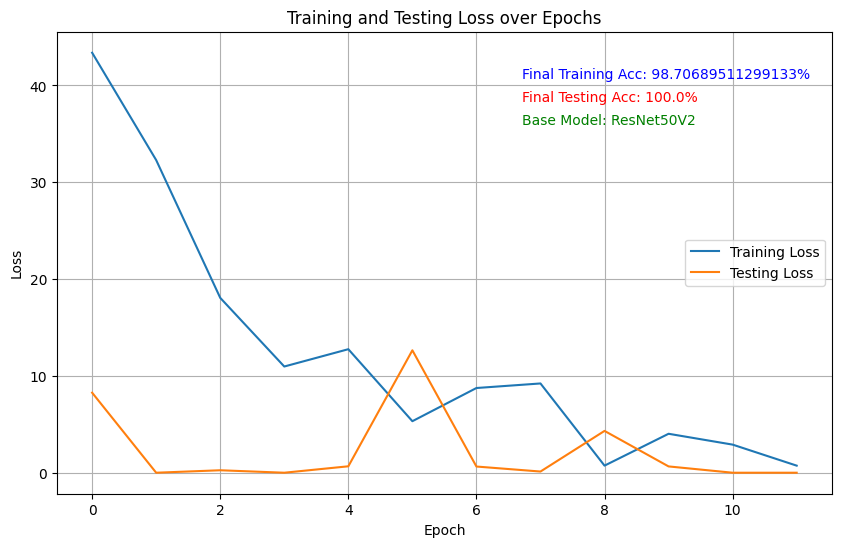

In [44]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
chosen_base_model = best_hps.get('base_model')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()


final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

plt.text(0.6, 0.9, f'Final Training Acc: {final_train_accuracy*100}%', transform=plt.gca().transAxes, fontsize=10, color='blue')
plt.text(0.6, 0.85, f'Final Testing Acc: {final_val_accuracy*100}%', transform=plt.gca().transAxes, fontsize=10, color='red')
plt.text(0.6, 0.8, f'Base Model: {chosen_base_model}', transform=plt.gca().transAxes, fontsize=10, color='green')
plt.grid(True)
plt.show()

In [45]:
!pip install pydot graphviz
import pydot
import graphviz

from tensorflow.keras.utils import plot_model

plot_model(best_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image(filename='model_architecture.png')

In [46]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
chosen_base_model = best_hps.get('base_model')

print(f"The chosen pre-trained model is: {chosen_base_model}")

print("\nModel Summary (including trainable and non-trainable parameters):\n")
best_model.summary()

# To explicitly show a few weights and biases (optional, as summary gives counts)
print("\n--- Example of first layer's weights and biases (shapes only): ---")
for layer in best_model.layers:
    if layer.get_weights(): # Check if layer has weights
        print(f"Layer: {layer.name}")
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            if i % 2 == 0: # Even indices are typically weights
                print(f"  Weights shape: {w.shape}")
            else: # Odd indices are typically biases
                print(f"  Biases shape: {w.shape}")
        break # Only show for the first layer for brevity

The chosen pre-trained model is: ResNet50V2

Model Summary (including trainable and non-trainable parameters):



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 62,889,483 (239.90 MB)

 Trainable params: 13,108,227 (50.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 26,216,456 (100.01 MB)


--- Example of first layer's weights and biases (shapes only): ---
Layer: conv1_conv
  Weights shape: (7, 7, 3, 64)
  Biases shape: (64,)


In [47]:
model_save_path = 'best_food_classifier.keras'
best_model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to best_food_classifier.keras


In [48]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model(model_save_path)

print("Model loaded successfully.")

Model loaded successfully.


In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(image_height, image_width)) # image_height and image_width are 150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array /= 255.0 # Normalize to [0,1]
    return img_array

print("Image preprocessing function `preprocess_image` defined successfully.")

Image preprocessing function `preprocess_image` defined successfully.


In [50]:
def predict_image_class(preprocessed_img_array, model):
    predictions = model.predict(preprocessed_img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_probability = np.max(predictions, axis=1)[0]

    # Get class labels from the train_generator
    class_labels = list(train_generator.class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, predicted_probability

print("Image prediction function `predict_image_class` defined successfully.")

Image prediction function `predict_image_class` defined successfully.


In [51]:
pip install gradio

In [53]:
import gradio as gr
from PIL import Image

def classify_image(input_image):
    # Save the input image temporarily to a file, then pass the path to preprocess_image
    # Gradio's Image input component returns a PIL Image object, not a path directly
    # We need to save it to a temporary file or convert it to a numpy array

    # Convert PIL Image to numpy array, then preprocess
    img_array_from_gradio = np.array(input_image)
    img_array_resized = Image.fromarray(img_array_from_gradio).resize((image_height, image_width))
    img_array_processed = np.expand_dims(np.array(img_array_resized), axis=0) / 255.0

    predicted_class_label, predicted_probability = predict_image_class(img_array_processed, loaded_model)

    return f"Predicted Class: {predicted_class_label} (Probability: {predicted_probability:.2f})"

# Create the Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload Food Image"),
    outputs="text",
    title="Food Image Classifier",
    description="Upload an image of food to classify it into Low, Medium, or High success score categories."
)

# Launch the interface
iface.launch(debug=True, share=True)

print("Gradio interface created and launched successfully.")

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://18bba35dd3f7973a32.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1134, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://18bba35dd3f7973a32.gradio.live
Gradio interface created and launched successfully.


In [54]:
app_py_content = """import tensorflow as tf
import numpy as np
import gradio as gr
from PIL import Image
from tensorflow.keras.preprocessing import image
import os

# 1. Configuration Variables
image_height, image_width = 150, 150 # Target size used during model training
model_save_path = 'best_food_classifier.keras'

# Hardcoded class labels as train_generator won't be available
class_labels = ['High Score', 'Low Score', 'Medium Score'] # Ordered alphabetically by Gradio if not specified

# 2. Load the trained model
# Ensure the model file 'best_food_classifier.keras' is in the same directory as app.py
loaded_model = tf.keras.models.load_model(model_save_path)

# 3. Preprocessing Function
def preprocess_image(input_image_pil):
    # Gradio's Image input component returns a PIL Image object
    img_array_resized = input_image_pil.resize((image_height, image_width))
    img_array = image.img_to_array(img_array_resized)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array /= 255.0 # Normalize to [0,1]
    return img_array

# 4. Prediction Function
def predict_image_class(preprocessed_img_array, model):
    predictions = model.predict(preprocessed_img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_probability = np.max(predictions, axis=1)[0]

    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, predicted_probability

# 5. Gradio Interface Function
def classify_image(input_image):
    # Ensure input_image is a PIL Image
    if not isinstance(input_image, Image.Image):
        raise ValueError("Input must be a PIL Image.")

    processed_img = preprocess_image(input_image)
    predicted_label, predicted_prob = predict_image_class(processed_img, loaded_model)

    # Gradio expects output to be structured if it's not plain text
    # Here we are returning a string.
    return f"Predicted Class: {predicted_label} (Probability: {predicted_prob:.2f})"

# 6. Gradio App Setup
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload Food Image"),
    outputs="text",
    title="Food Image Classifier",
    description="Upload an image of food to classify its success score category: High, Medium, or Low."
)

# 7. Launch the interface (for local testing or when run directly)
if __name__ == "__main__":
    iface.launch(share=True)
"""

# Write the content to app.py
with open('app.py', 'w') as f:
    f.write(app_py_content)

print("Created app.py successfully. Please ensure 'best_food_classifier.keras' is in the same directory.")


Created app.py successfully. Please ensure 'best_food_classifier.keras' is in the same directory.


In [55]:
requirements_content = """tensorflow==2.16.1
numpy==1.26.4
gradio==4.36.1
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("Created requirements.txt successfully.")

Created requirements.txt successfully.
